This notebook illustrates some functionnalities exposed in the `DataGlue` package. See also [iris_exploration](./iris_exploration.ipynb) for basics data science demonstrations.

## Read dataframe content

Here, we read the [salaries dataset](../datasets/salaries.csv) as a `Frame`. The type of its row, `SalaryRow`, is dynamically inferred by the parser. 

In [1]:
:ext DataKinds FlexibleContexts QuasiQuotes OverloadedStrings TemplateHaskell TypeApplications TypeOperators ViewPatterns
import DataGlue.Frames

datasource = "../datasets/salaries.csv"

tableTypes "SalaryRow" datasource

loadRows :: IO (Frame SalaryRow)
loadRows = inCoreAoS (readTable datasource)

salaries <- loadRows

Then, we can show the dataframe content, simply by calling it.

In [2]:
-- Show dataframe content.
salaries

"""""",rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,"""Prof""","""B""",19,18,"""Male""",139750
2,"""Prof""","""B""",20,16,"""Male""",173200
3,"""AsstProf""","""B""",4,3,"""Male""",79750
4,"""Prof""","""B""",45,39,"""Male""",115000
5,"""Prof""","""B""",40,41,"""Male""",141500
6,"""AssocProf""","""B""",6,6,"""Male""",97000
7,"""Prof""","""B""",30,23,"""Male""",175000
8,"""Prof""","""B""",45,45,"""Male""",147765
9,"""Prof""","""B""",21,20,"""Male""",119250
10,"""Prof""","""B""",18,18,"""Female""",129000


As the dataframe has many rows, only its first and last rows are shown. We get the total number of rows using the function `length`.

In [3]:
length salaries

397
Message: PublishDisplayData {header = MessageHeader {identifiers = ["7ea497a4-d403-4dd8-b6a3-b014b7535bfb"], parentHeader = Just (MessageHeader {identifiers = ["7ea497a4-d403-4dd8-b6a3-b014b7535bfb"], parentHeader = Nothing, metadata = fromList [], messageId = UUID {uuidToString = "76008c11-c017-4933-8a1d-ea9461897b5b"}, sessionId = UUID {uuidToString = "7ea497a4-d403-4dd8-b6a3-b014b7535bfb"}, username = "", msgType = ExecuteRequestMessage}), metadata = fromList [], messageId = UUID {uuidToString = "d5d733bf-683f-4420-abd9-cc951079da12"}, sessionId = UUID {uuidToString = "7ea497a4-d403-4dd8-b6a3-b014b7535bfb"}, username = "", msgType = DisplayDataMessage}, displayData = [DisplayData]}
Sent: "{\"data\":{\"text/plain\":\"397\"},\"metadata\":{}}"

It is also usefull to get the column names and types:

In [4]:
describe salaries

397x7 dataframe.
  column """": Int
  column "rank": Text
  column "discipline": Text
  column "yrs.since.phd": Int
  column "yrs.service": Int
  column "sex": Text
  column "salary": Int

## Read dataframe content (without header)

Unlike the previous example, the [iris dataset](../datasets/iris.csv) has no headers. So, we define them here manually, then proceed to the parsing.

In [5]:
import Frames.CSV (rowGen, columnNames, tablePrefix, rowTypeName)

-- Since the used dataset as no header, let's define the column names.
datasource = "../datasets/iris.csv"
tableTypes' (rowGen datasource)
            { rowTypeName = "IrisRow"
            , columnNames = [ "Petal Length", "Petal Width", "Sepal Length" , "Sepal Width", "Iris Class" ]}

loadRows :: IO (Frame IrisRow)
loadRows = inCoreAoS (readTable datasource)

iris <- loadRows

-- Show dataframe content.
iris

Petal Length,Petal Width,Sepal Length,Sepal Width,Iris Class
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""
5.4,3.9,1.7,0.4,"""Iris-setosa"""
4.6,3.4,1.4,0.3,"""Iris-setosa"""
5.0,3.4,1.5,0.2,"""Iris-setosa"""
4.4,2.9,1.4,0.2,"""Iris-setosa"""
4.9,3.1,1.5,0.1,"""Iris-setosa"""
5.4,3.7,1.5,0.2,"""Iris-setosa"""


## Print records

Some functions are exposed to read partial content of a dataframe.

Read one line:

In [6]:
frameRow salaries 5

"""""",rank,discipline,yrs.since.phd,yrs.service,sex,salary
6,"""AssocProf""","""B""",6,6,"""Male""",97000


Show the 5th first lines:

In [7]:
takeFrameRow 5 salaries

"""""",rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,"""Prof""","""B""",19,18,"""Male""",139750
2,"""Prof""","""B""",20,16,"""Male""",173200
3,"""AsstProf""","""B""",4,3,"""Male""",79750
4,"""Prof""","""B""",45,39,"""Male""",115000
5,"""Prof""","""B""",40,41,"""Male""",141500


Or the 5th last, by removing all the rows but 5, from the begining:

In [8]:
dropFrameRow (length salaries - 5) salaries

"""""",rank,discipline,yrs.since.phd,yrs.service,sex,salary
393,"""Prof""","""A""",33,30,"""Male""",103106
394,"""Prof""","""A""",31,19,"""Male""",150564
395,"""Prof""","""A""",42,25,"""Male""",101738
396,"""Prof""","""A""",25,15,"""Male""",95329
397,"""AsstProf""","""A""",8,4,"""Male""",81035


Using `Proxy`, we can also make a selection, to get only the features we want to explore:

In [9]:
import Data.Proxy
select @'[YrsSincePhd, Salary] Proxy <$> salaries

yrs.since.phd,salary
19,139750
20,173200
4,79750
45,115000
40,141500
6,97000
30,175000
45,147765
21,119250
18,129000


Using `Lens`, it is also simple to get one feature content:

In [10]:
import Control.Lens
view salary <$> salaries

139750
173200
79750
115000
141500
97000
175000
147765
119250
129000
. . .


## Basic operations based on criteria

Here we define a criteria function that anwser `True` only when the given row invovles a women at the rank of Professor. Based on it, we count the number of female Professor in the dataframe.

In [11]:
-- A Top-level function will be designed in the future to give this kind of call mpre abstraction.
femaleProf = runcurry' criteria . select @'[Rank, Sex] Proxy
  where
    criteria "Prof" "Female" = True
    criteria _ _ = False

fp_df = filterFrame femaleProf salaries
length fp_df

18

## Chart plotting

This is a simple example of chart plotting using some groupBy fonctionnalities provided by `DataGlue.Frames.GroupBy`.

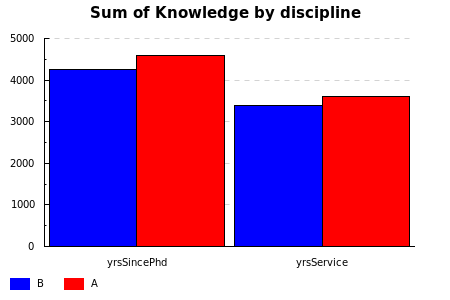

In [12]:
import qualified DataGlue.Frames.GroupBy as G
import Data.Text (unpack)
import DataGlue.Chart

sums = G.groupByOp discipline salaries (G.sum) [yrsSincePhd, yrsService]
alabels = ["yrsSincePhd","yrsService"]

bars2 = plot_bars_titles .~ (unpack <$> uniques discipline salaries)
    $ plot_bars_values .~ addIndexes sums
    $ def
    
toRenderable
    $ layout_title .~ "Sum of Knowledge by discipline"
    $ layout_x_axis . laxis_generate .~ autoIndexAxis alabels
    $ layout_plots .~ [ plotBars bars2 ]
    $ def